
### Universidad del Valle de Guatemala 
### Facultad de Ingeniería
### Departamento de Ciencias de la Computación
### CC3094 – Security Data Science

### Laboratorio #3 MALWARE DETECTION

- Eduardo Ramirez 19946

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gensim.models import Word2Vec
from gensim.models.phrases import Phrases
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [2]:

def concatenate_columns(row):
    return ' '.join(row.dropna().astype(str))

def get_word_vectors(words, model):
    return np.mean([model.wv[word] for word in words if word in model.wv], axis=0)

In [3]:

# * Dataset original
ruta_csv = r'./dataset.csv'
df = pd.read_csv(ruta_csv)
display(df)

# * Nuevo Dataset
df['sequence'] = df[df.columns[2:]].apply(concatenate_columns, axis=1)
sent = [row.split() for row in df['sequence']]
phrases = Phrases(sent, min_count=30, progress_per=10000)
sentences = phrases[sent]
w2v_model = Word2Vec(min_count=20, window=2, vector_size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20)
w2v_model.build_vocab(sentences, progress_per=10000)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
y = df['labels']
df = df.drop(df.columns[2:-1], axis=1)
df['vector'] = df['sequence'].apply(lambda x: get_word_vectors(x.split(), w2v_model))
df.to_csv("dataset_clean.csv", index=False)


,sha256,labels,0,1,2,3,4,5,6,7,...,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176
0,5c18291c481a192ed5003084dab2d8a117fd3736359218...,0,LdrUnloadDll,CoUninitialize,NtQueryKey,NtDuplicateObject,GetShortPathNameW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...,0,NtOpenMutant,GetForegroundWindow,NtQueryKey,DrawTextExW,NtSetInformationFile,RegQueryValueExA,LdrGetProcedureAddress,CoUninitialize,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9a0aea1c7290031d7c3429d0e921f107282cc6eab854ee...,0,GetForegroundWindow,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtQueryValueKey,RegCloseKey,GetFileAttributesW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e0f3e4d5f50afd9c31e51dd9941c5a52d57c7c524f5d11...,0,NtQueryValueKey,LdrUnloadDll,GlobalMemoryStatus,WriteConsoleA,NtOpenKey,LdrGetProcedureAddress,NtTerminateProcess,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ec2b6d29992f13e74015ff0b129150b4afae15c593e4b7...,0,LdrUnloadDll,GetSystemTimeAsFileTime,NtOpenKey,WSAStartup,SetUnhandledExceptionFilter,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,ed6a3fc04af435176b9c2f3024eb53c31d1e522da52c5c...,1,CreateToolhelp32Snapshot,GetCursorPos,CoUninitialize,RegCloseKey,LdrUnloadDll,DrawTextExW,NtSetInformationFile,CopyFileA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2566,ed5d70a13633a46355c0c2f9905ba29b7b74dfdb4db321...,1,NtDuplicateObject,RegCloseKey,LdrUnloadDll,NtSetInformationFile,RegQueryValueExA,NtTerminateProcess,NtQueryValueKey,RegQueryValueExW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2567,ed5addbdbe5f56f108530148c71ab7db806ac9324395d0...,1,GetCursorPos,NtOpenSection,CoUninitialize,RegCloseKey,LdrUnloadDll,GetSystemInfo,RegQueryValueExA,NtTerminateProcess,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2568,ed4f4518e3120a4fd8ff6c61bf072d4de60264711a9196...,1,NtAllocateVirtualMemory,LdrGetProcedureAddress,SetUnhandledExceptionFilter,GetFileType,GetSystemTimeAsFileTime,LdrLoadDll,LdrGetDllHandle,NtProtectVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2 = pd.read_csv('dataset_clean.csv')
X_train, X_test, y_train, y_test = train_test_split(df['vector'].tolist(), y, test_size=0.3, random_state=42)


- #### Regresión logística

Reporte de Clasificación para el modelo de Regresión Logística:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       380
           1       0.94      0.90      0.92       391

    accuracy                           0.92       771
   macro avg       0.92      0.92      0.92       771
weighted avg       0.92      0.92      0.92       771

Validación cruzada para el modelo de Regresión Logística:
0.882101167315175


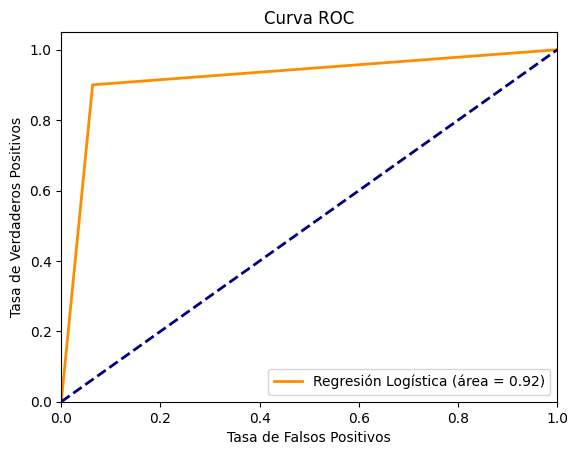

In [7]:

# * Modelo
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# * Resultados
print("Reporte de Clasificación para el modelo de Regresión Logística:")
print(classification_report(y_test, y_pred_lr))

# * Validacion
kf = KFold(n_splits=10)
print("Validación cruzada para el modelo de Regresión Logística:")
print(cross_val_score(lr, df['vector'].tolist(), y, cv=kf).mean())
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# * ROC
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Regresión Logística (área = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

- #### Random Forest

Reporte de Clasificación para el modelo de Bosques Aleatorios:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       380
           1       0.97      0.95      0.96       391

    accuracy                           0.96       771
   macro avg       0.96      0.96      0.96       771
weighted avg       0.96      0.96      0.96       771

Validación cruzada para el modelo de Bosques Aleatorios:
0.9431906614785992


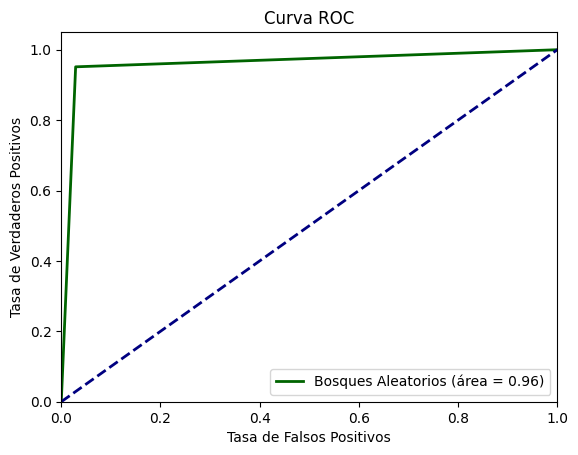

In [8]:

# * Modelo
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# * Resultados
print("Reporte de Clasificación para el modelo de Bosques Aleatorios:")
print(classification_report(y_test, y_pred_rf))
kf = KFold(n_splits=10)

# * Validacion
print("Validación cruzada para el modelo de Bosques Aleatorios:")
print(cross_val_score(rf, df['vector'].tolist(), y, cv=kf).mean())
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# * ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label='Bosques Aleatorios (área = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Discusión

Precision y Recall:

Los dos modelos mostraron un rendimiento similar en la precision y el recall pero el segundo modelo tiene mejores metricas.

F1-score: 

Se encontro equilibrio entre precision y recall pero el segundo modelo tiene un score un poco superior.

Accuracy: 

El segundo modelo tiene una precisión general más alta en comparación al primero.

Primero: 92%
Segundo: 96%

Validación Cruzada: 

El segundo modelo es superior al primero en comparación a la puntuación de validacion cruzada por lo tanto hay mas consistencia y robustez en diferentes particiones informacion.

Conclusión:

En términos generales, el segundo modelo de random forest muestra un desempeño superior al primer modelo de Regresión Logística en la tarea de detección de malware. Esto se evidencia en una precisión general más alta, así como en mejores valores de precisión y recall para ambas clases de malware. Además, el segundo modelo obtiene una puntuación de validación cruzada más alta, lo que refuerza su eficacia en esta tarea específica. En resumen, se puede concluir que el segundo modelo es más efectivo para la detección de malware en comparación con el primero.






